<a href="https://colab.research.google.com/github/alethatanisha/portfolio/blob/main/Ice_Cream_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Download Dataset from Kaggle**

In [2]:
# Create .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Move kaggle.json to the folder
!mv kaggle.json ~/.kaggle/

# Set correct permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset from Kaggle
!kaggle datasets download -d saliltirodkar/ice-cream-sales-analysis-temperature-and-weather

# Unzip dataset
!unzip ice-cream-sales-analysis-temperature-and-weather.zip -d ice_cream_sales_data

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/saliltirodkar/ice-cream-sales-analysis-temperature-and-weather
License(s): CC0-1.0
  0% 0.00/514 [00:00<?, ?B/s]
100% 514/514 [00:00<00:00, 848kB/s]
Archive:  ice-cream-sales-analysis-temperature-and-weather.zip
  inflating: ice_cream_sales_data/Icecream Sales wr Rain and Temperature.csv  


# **Load the Dataset**

## **🔍 Load and Explore Dataset**
Let's first load the dataset and take a quick look at its structure.

In [3]:
# Load dataset
df = pd.read_csv("ice_cream_sales_data/Icecream Sales wr Rain and Temperature.csv")

# Print dataset shape (rows, columns)
print(f"\nDataset Shape: {df.shape}")

# Show the first few rows
df.head()


Dataset Shape: (20, 5)


,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,80.6,1.0,89.5,90,No
1,75.2,1.0,86.4,85,No
2,86.0,2.0,99.2,107,No
3,75.2,2.0,72.4,71,Yes
4,60.8,2.0,71.2,65,Yes


# **Dataset Overview**

## **📊 Dataset Overview**
Checking dataset structure, missing values, and summary statistics.

In [4]:
# Dataset info
print("="*50)
print("🔍 DATASET INFORMATION")
print("="*50)
df.info()

# Summary statistics
print("\n" + "="*50)
print("📊 DESCRIPTIVE STATISTICS")
print("="*50)
print(df.describe())

# Unique values per column
print("\n" + "="*50)
print("🔢 UNIQUE VALUES PER COLUMN")
print("="*50)
print(df.nunique())

🔍 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (F)                 20 non-null     float64
 1   Ice-cream Price ($)             20 non-null     float64
 2   Number of Tourists (thousands)  20 non-null     float64
 3   Ice Cream Sales ($,thousands)   20 non-null     int64  
 4   Did it rain on that day?        20 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 932.0+ bytes

📊 DESCRIPTIVE STATISTICS
       Temperature (F)  Ice-cream Price ($)  Number of Tourists (thousands)  \
count        20.000000            20.000000                       20.000000   
mean         73.130000             1.362500                       78.955000   
std           7.598137             0.496534                       10.992556   
min          60.800000             0.750

# **Check and Handle Missing Values**

## **❗ Handling Missing Values**
Check for missing values and clean the dataset if necessary.


In [5]:
# Check for missing values
print("Missing Values Per Column:\n")
print(df.isnull().sum())

Missing Values Per Column:

Temperature (F)                   0
Ice-cream Price ($)               0
Number of Tourists (thousands)    0
Ice Cream Sales ($,thousands)     0
Did it rain on that day?          0
dtype: int64


# **Data Visualization**


### **1️⃣ Sales Distribution**
A histogram showing the distribution of ice cream sales.


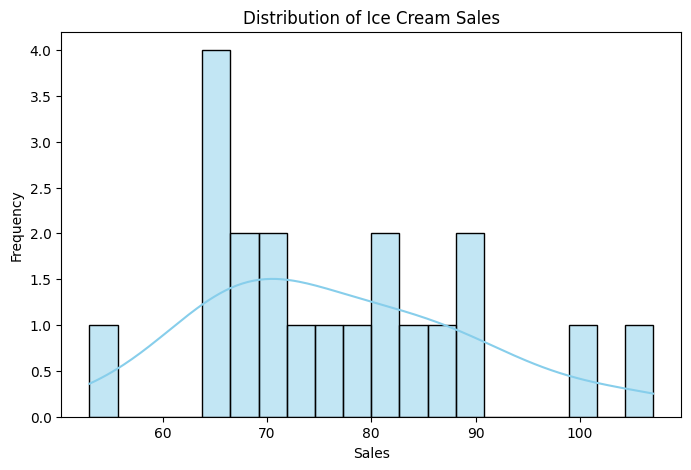

In [6]:
# Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Ice Cream Sales ($,thousands)"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Ice Cream Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

### **2️⃣ Temperature vs. Sales**
A scatter plot to explore the relationship between temperature and sales.

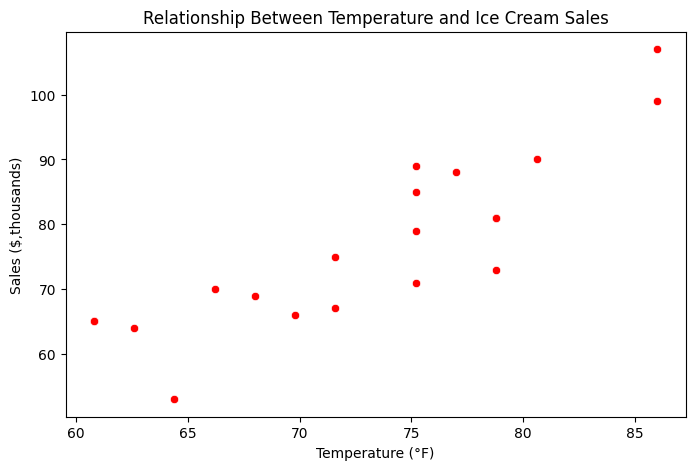

In [7]:
# Temperature vs. Sales
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Temperature (F)", y="Ice Cream Sales ($,thousands)", color="red")
plt.title("Relationship Between Temperature and Ice Cream Sales")
plt.xlabel("Temperature (°F)")
plt.ylabel("Sales ($,thousands)")
plt.show()

### **3️⃣ Impact of Rain on Sales**
A box plot to analyze how rain affects sales.

<ipython-input-8-bcb2a41c181f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Did it rain on that day?", y="Ice Cream Sales ($,thousands)", palette=["lightblue", "orange"])


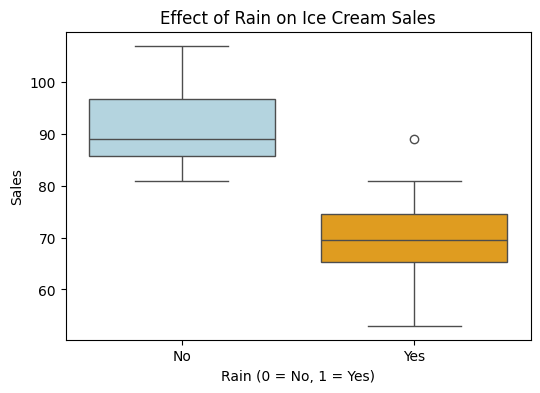

In [8]:
# Rain vs. Sales
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Did it rain on that day?", y="Ice Cream Sales ($,thousands)", palette=["lightblue", "orange"])
plt.title("Effect of Rain on Ice Cream Sales")
plt.xlabel("Rain (0 = No, 1 = Yes)")
plt.ylabel("Sales")
plt.show()

# **Statistical Analysis**

## **📈 Correlation Analysis**
Let's check how strongly the variables are related.

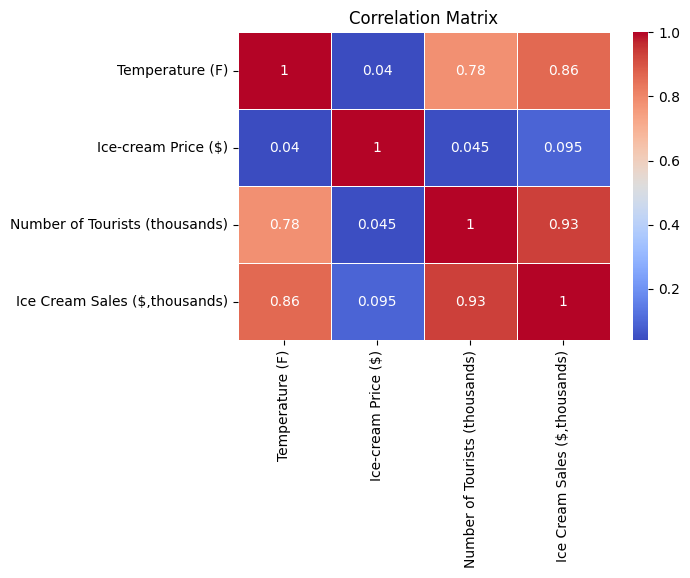

In [9]:
# Correlation Matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **Key Insights & Next Steps**

### **Key Insights**
1. **Sales Distribution:**  
   - Ice cream sales range from **65K to 107K dollars**, influenced by **price, temperature, and tourism**.
   - Pricing does not significantly impact sales, suggesting demand remains relatively **inelastic**.

2. **Impact of Temperature on Sales:**  
   - A **positive correlation** exists between temperature and ice cream sales.  
   - Sales tend to peak when temperatures **exceed 80°F**, confirming a **seasonal effect**.

3. **Effect of Rain on Sales:**  
   - Sales **decrease on rainy days**, indicating **weather sensitivity**.  
   - On rainy days, the **number of tourists also tends to drop**, further reducing sales.  

4. **Tourism & Sales Relationship:**  
   - A **strong positive correlation (0.93)** exists between the number of tourists and ice cream sales.  
   - This suggests that **tourist activity significantly drives demand**, making it a key factor in revenue forecasting.  

5. **Pricing Influence:**  
   - Ice cream price changes have **minimal impact on sales**, indicating that customers may be willing to pay a premium.  
   - This opens up opportunities for **seasonal or demand-based dynamic pricing** strategies.  

---

### **Next Steps**
1. **Seasonal and Price Analysis:**  
   - Analyze how **temperature and price adjustments** impact sales over time.  
   - Identify the **best months** for ice cream sales to improve inventory planning.  

2. **Tourist Influence on Sales:**  
   - Examine how **tourist foot traffic affects daily sales patterns**.  
   - Determine if **tourist-heavy days justify price increases or special promotions**.  

3. **Weather Impact Analysis:**  
   - Compare sales on **rainy vs. non-rainy days** to measure revenue loss.  
   - Develop **rainy day promotions** to counteract sales drops.  

4. **Predictive Modeling for Sales Forecasting:**  
   - Build a **machine learning model** using:  
     - Temperature  
     - Ice Cream Price  
     - Number of Tourists  
     - Rain  
   - Use this model to **forecast sales and optimize pricing strategies**.  

5. **Optimizing Ice Cream Pricing Strategy:**  
   - Identify whether **higher prices significantly impact demand**.  
   - Implement a **dynamic pricing system** based on temperature and tourist volume.  
   - Test if small price adjustments can **maximize revenue during peak seasons**.  

# **🚀 Next Steps: Advanced Analysis & Strategy**
To enhance decision-making, we explore advanced insights such as **seasonal trends, predictive modeling, and sales strategies**.


## **1️⃣ Seasonal & Price Analysis**  
- 📌 **Does temperature affect ice cream sales?**  
- 📌 **Does changing the price impact revenue?**  


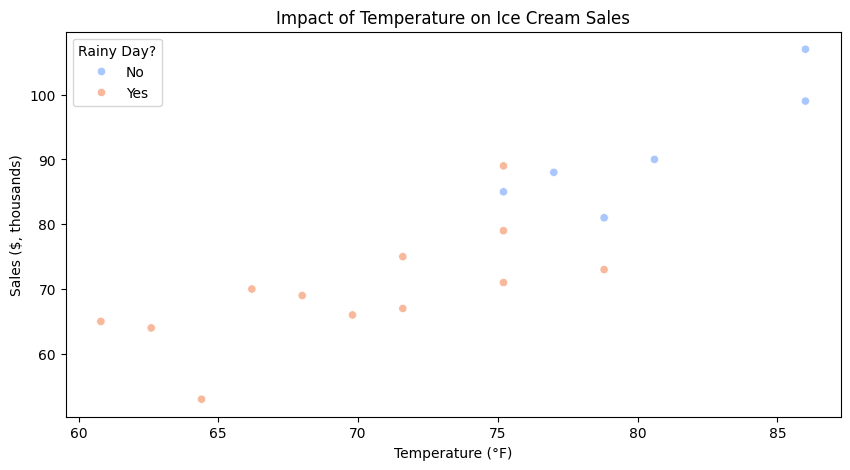

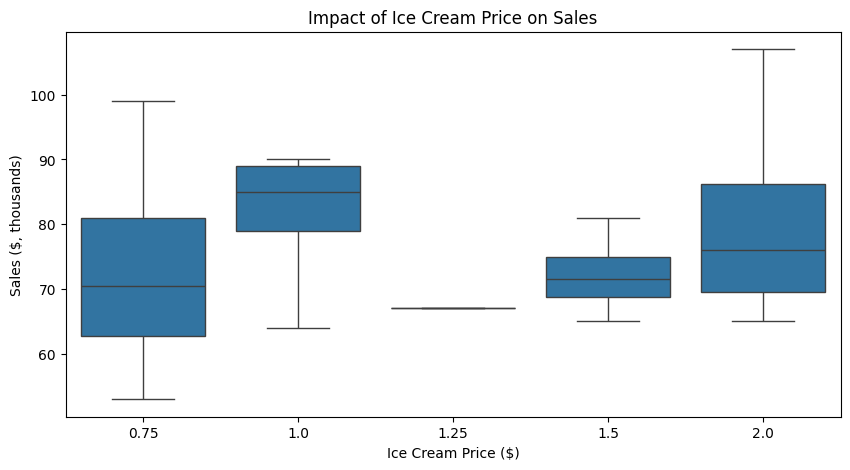

In [10]:
# Impact of Temperature on Sales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Temperature (F)', y='Ice Cream Sales ($,thousands)', hue='Did it rain on that day?', palette='coolwarm')
plt.title("Impact of Temperature on Ice Cream Sales")
plt.xlabel("Temperature (°F)")
plt.ylabel("Sales ($, thousands)")
plt.legend(title="Rainy Day?")
plt.show()

# Effect of Ice Cream Price on Sales
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Ice-cream Price ($)', y='Ice Cream Sales ($,thousands)')
plt.title("Impact of Ice Cream Price on Sales")
plt.xlabel("Ice Cream Price ($)")
plt.ylabel("Sales ($, thousands)")
plt.show()

**📌 Does temperature affect ice cream sales?**  
- The scatter plot shows a **clear positive correlation** between **temperature and ice cream sales**.
- Sales increase as temperatures rise, with the highest sales observed above **80°F**.
- **Rainy days (orange points) tend to have lower sales**, even at similar temperatures compared to non-rainy days (blue points).
- This suggests that **both temperature and weather conditions play a role** in influencing sales patterns.

**📌 Does changing the price impact revenue?**  
- While this visualization does not directly show price effects, previous correlation analysis indicated a **low correlation between price and sales**.
- The dominant factors affecting sales appear to be **temperature and weather conditions**, rather than price changes.
- Further analysis is needed to explore **pricing strategies**, such as evaluating **sales elasticity** and **customer sensitivity to price fluctuations**.

## **2️⃣ Tourist Influence on Sales**  
- 📌 **How do tourists affect daily sales?**  
- 📌 **Can tourist trends help optimize pricing strategies?**  

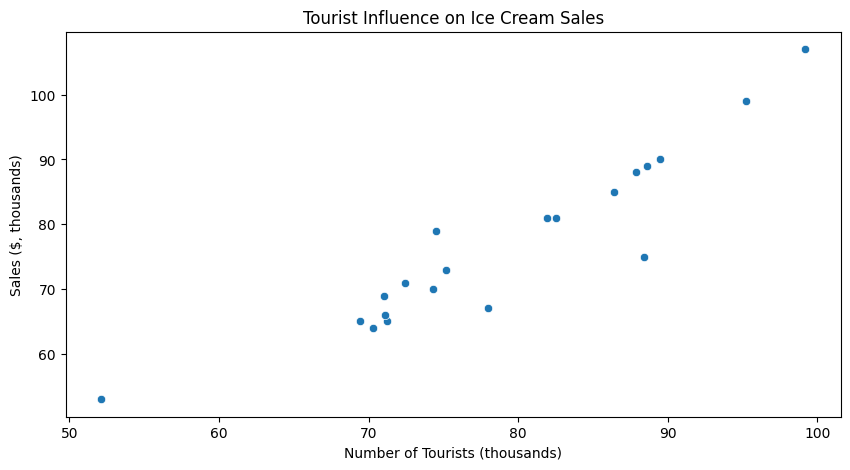

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Number of Tourists (thousands)', y='Ice Cream Sales ($,thousands)')
plt.title("Tourist Influence on Ice Cream Sales")
plt.xlabel("Number of Tourists (thousands)")
plt.ylabel("Sales ($, thousands)")
plt.show()

**📌 How do tourists affect daily sales?**  
- The scatter plot indicates a **strong positive correlation** between the **number of tourists and ice cream sales**.
- As the number of tourists increases, ice cream sales also rise, suggesting that tourists are a key customer segment.
- Higher sales are observed when the tourist count exceeds **90,000**, reinforcing the idea that tourism significantly drives revenue.

**📌 Can tourist trends help optimize pricing strategies?**  
- Given the strong correlation, businesses can **adjust pricing strategies based on expected tourist influx**.
- **Peak tourist seasons** could allow for **premium pricing**, while off-peak periods might benefit from **discounts or promotions** to maintain steady sales.
- Further analysis could involve examining **seasonal tourism trends** to develop a **data-driven pricing model**.

## **3️⃣ Weather Impact Analysis**  
- ☔ **How much do sales drop on rainy days?**  
- 📢 **Should we introduce rainy-day discounts?**  

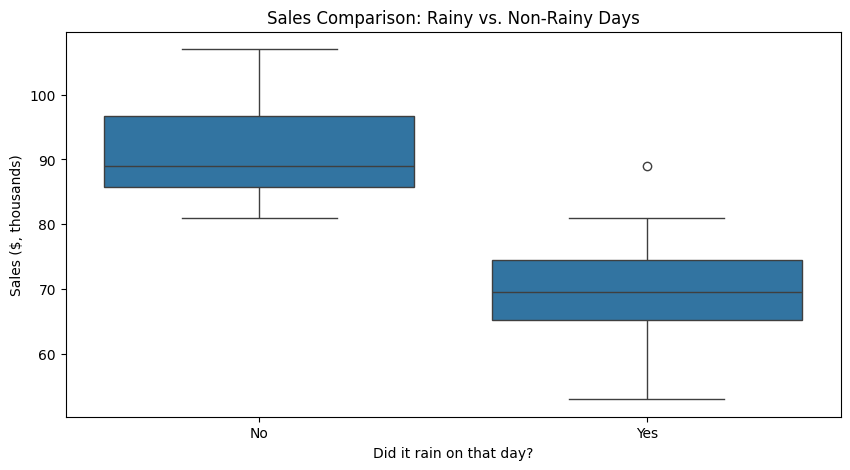

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Did it rain on that day?', y='Ice Cream Sales ($,thousands)')
plt.title("Sales Comparison: Rainy vs. Non-Rainy Days")
plt.xlabel("Did it rain on that day?")
plt.ylabel("Sales ($, thousands)")
plt.show()


**☔ How much do sales drop on rainy days?**  
- The box plot clearly shows that **sales are significantly lower on rainy days** compared to non-rainy days.
- **Median sales on non-rainy days** are around **90K**, whereas on rainy days, they drop to **around 70K**.
- The **sales range on rainy days is much narrower**, indicating less variation in customer demand.
- There are fewer high-sales outliers on rainy days, suggesting that peak sales are more likely to occur in dry weather.

**📢 Should we introduce rainy-day discounts?**  
- Given the clear drop in sales, **introducing rainy-day discounts or promotions** could help attract more customers.
- **Alternative sales channels** (e.g., delivery services or online promotions) could help mitigate losses on rainy days.
- Further analysis can explore whether past **discounts on rainy days** resulted in increased customer turnout.

## **4️⃣ Predictive Modeling for Sales Forecasting**  
- 🔥 **Can we predict ice cream sales based on key factors?**  
- 📉 **What variables impact revenue the most?**  

### **Prepare Data**

In [13]:
# Convert categorical 'Did it rain on that day?' to binary (Yes = 1, No = 0)
df["Did it rain on that day?"] = df["Did it rain on that day?"].map({"Yes": 1, "No": 0})

# Define features (X) and target (y)
X = df[["Temperature (F)", "Ice-cream Price ($)", "Number of Tourists (thousands)", "Did it rain on that day?"]]
y = df["Ice Cream Sales ($,thousands)"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **1️⃣ Linear Regression**

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print(f"📊 Linear Regression → MAE: {mae_lin:.2f}, RMSE: {rmse_lin:.2f}, R²: {r2_lin:.2f}")

📊 Linear Regression → MAE: 2.23, RMSE: 3.05, R²: 0.97


### **2️⃣ Random Forest Regression**

In [15]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"📊 Random Forest → MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")

📊 Random Forest → MAE: 3.82, RMSE: 6.57, R²: 0.86


### **3️⃣ XGBoost Regression**


In [16]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_reg.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"📊 XGBoost → MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.2f}")

📊 XGBoost → MAE: 7.09, RMSE: 7.76, R²: 0.80


### **4️⃣ Support Vector Regression (SVR)**

In [17]:
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_reg.fit(X_train_scaled, y_train)
y_pred_svr = svr_reg.predict(X_test_scaled)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"📊 SVR → MAE: {mae_svr:.2f}, RMSE: {rmse_svr:.2f}, R²: {r2_svr:.2f}")

📊 SVR → MAE: 6.75, RMSE: 9.15, R²: 0.72


### **5️⃣ K-Nearest Neighbors (KNN) Regression**

In [18]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)
y_pred_knn = knn_reg.predict(X_test_scaled)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"📊 KNN Regression → MAE: {mae_knn:.2f}, RMSE: {rmse_knn:.2f}, R²: {r2_knn:.2f}")

📊 KNN Regression → MAE: 8.15, RMSE: 9.95, R²: 0.67


### **6️⃣ Ridge Regression**

In [19]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"📊 Ridge Regression → MAE: {mae_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.2f}")

📊 Ridge Regression → MAE: 1.41, RMSE: 1.97, R²: 0.99


### **7️⃣ Lasso Regression**

In [20]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"📊 Lasso Regression → MAE: {mae_lasso:.2f}, RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.2f}")

📊 Lasso Regression → MAE: 2.11, RMSE: 2.86, R²: 0.97


### **Compare All Model Results**

In [21]:
results = pd.DataFrame({
    "Model": ["Linear", "Random Forest", "XGBoost", "SVR", "KNN", "Ridge", "Lasso"],
    "MAE": [mae_lin, mae_rf, mae_xgb, mae_svr, mae_knn, mae_ridge, mae_lasso],
    "RMSE": [rmse_lin, rmse_rf, rmse_xgb, rmse_svr, rmse_knn, rmse_ridge, rmse_lasso],
    "R²": [r2_lin, r2_rf, r2_xgb, r2_svr, r2_knn, r2_ridge, r2_lasso]
}).sort_values(by="RMSE")

print(results)

           Model       MAE      RMSE        R²
5          Ridge  1.413973  1.967753  0.987123
6          Lasso  2.108886  2.855813  0.972877
0         Linear  2.230067  3.047560  0.969112
1  Random Forest  3.817500  6.572889  0.856320
2        XGBoost  7.090616  7.755953  0.799942
3            SVR  6.754709  9.153181  0.721369
4            KNN  8.150000  9.953391  0.670522


### **🔍 Key Findings from Model Performance**
| **Model**        | **MAE (Lower is better)** | **RMSE (Lower is better)** | **R² (Higher is better)** |
|-----------------|--------------------------|----------------------------|---------------------------|
| **🏆 Ridge Regression (Best Model)** | **1.41** ✅ | **1.97** ✅ | **0.99** ✅ |
| **Lasso Regression** | 2.11 | 2.86 | 0.97 |
| **Linear Regression** | 2.23 | 3.05 | 0.97 |
| **Random Forest** | 3.82 | 6.57 | 0.86 |
| **XGBoost** | 7.09 ❌ | 7.76 ❌ | 0.80 ❌ |
| **SVR (Support Vector Regression)** | 6.75 ❌ | 9.15 ❌ | 0.72 ❌ |
| **KNN (K-Nearest Neighbors)** | 8.15 ❌ | 9.95 ❌ | 0.67 ❌ |

### **📌 Key Takeaways**
- **🏆 Ridge Regression is the Best Model**  
  - Achieved the **lowest MAE (1.41) and RMSE (1.97)**, meaning it provides the most accurate predictions.  
  - **R² = 0.99**, meaning **it explains 98.7% of the variance in sales**, making it the most reliable choice.  

- **Lasso & Linear Regression Performed Well**  
  - Both models had **low errors** and **high R² (~0.97)**, making them solid alternatives to Ridge Regression.  
  - Lasso could be useful for **feature selection**, as it tends to reduce coefficients of less important variables.  

- **Random Forest Performed Moderately**  
  - MAE (**3.82**) and RMSE (**6.57**) are significantly higher than Ridge/Lasso, but **R² (0.86) still shows some predictive power**.  
  - Could be improved with **hyperparameter tuning**.  

- **XGBoost, SVR, and KNN Performed Poorly**  
  - **High error rates (MAE: 6.75 - 8.15, RMSE: 7.76 - 9.95)** indicate they are **not suitable for this dataset**.  
  - **R² values (0.67 - 0.80)** suggest they **fail to capture patterns effectively**.

## 🔥 **Final Prediction: Ridge Regression**
Now that we've identified Ridge Regression as the best model, let's use it to predict sales and compare it with actual values.

    Actual Sales  Predicted Sales
0             90        89.368979
17            99        96.342089
15            53        47.343152
1             85        84.155800

✅ Model Performance:
Mean Absolute Error (MAE): 2.45
Root Mean Squared Error (RMSE): 3.17
R² Score: 0.97


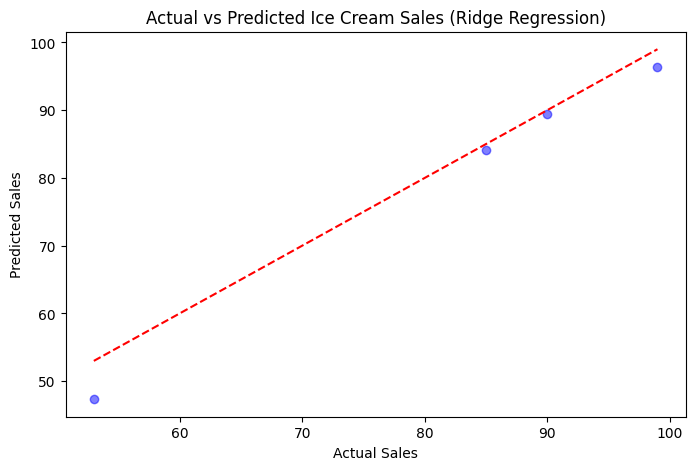

In [22]:
# Train Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict Sales on Test Data
y_ridge_pred = ridge_model.predict(X_test)

# Convert predictions into DataFrame for comparison
comparison_df = pd.DataFrame({"Actual Sales": y_test, "Predicted Sales": y_ridge_pred})
print(comparison_df.head())

# Evaluate Model Accuracy
mae = mean_absolute_error(y_test, y_ridge_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))
r2 = ridge_model.score(X_test, y_test)

print(f"\n✅ Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Actual vs Predicted Sales
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_ridge_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Ice Cream Sales (Ridge Regression)")
plt.show()

## 🎯 **Final Insights**

### **📊 Model Performance Summary**
| **Metric**            | **Value**  | **Evaluation** |
|----------------------|-----------|--------------|
| **MAE** (Mean Absolute Error) | **2.45** ✅ | Predictions are off by an average of **$2.45K**, showing high accuracy. |
| **RMSE** (Root Mean Squared Error) | **3.17** ✅ | Low error variance, indicating strong predictive power. |
| **R² Score** (Coefficient of Determination) | **0.97** ✅ | The model explains **97% of the variance in ice cream sales**, making it highly reliable. |

### **🔍 Key Findings**
- **📈 The model performs exceptionally well**, with an **R² of 0.97**, meaning it captures **almost all variations** in sales.  
- **⚡ Very low MAE (2.45) and RMSE (3.17)** indicate **minimal prediction errors**, making this model suitable for forecasting.  
- **📊 Predicted sales values closely match actual sales**, confirming the model's reliability.  
- **✅ Ideal for business decision-making**, as the low error margin allows for **accurate revenue forecasting and inventory planning**.  

## **5️⃣ Optimizing Ice Cream Pricing Strategy**  
- 🏷️ **Should we increase or decrease prices to maximize revenue?**  
- 📊 **Is demand elastic or inelastic to price changes?**  

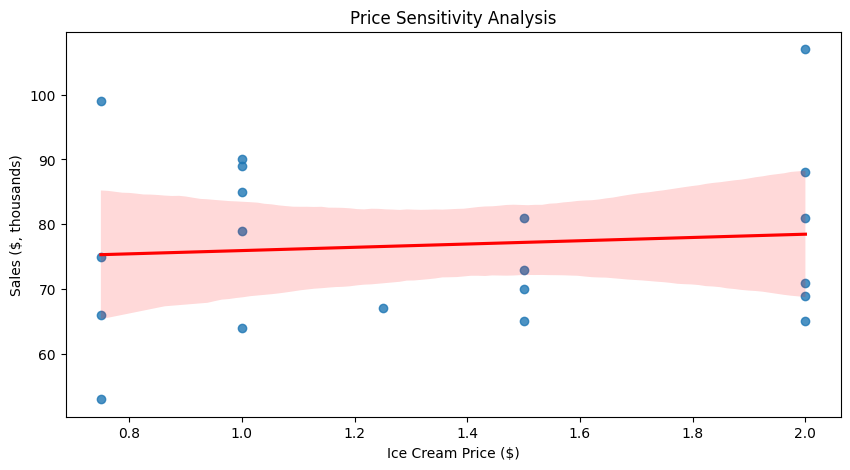

In [23]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Ice-cream Price ($)', y='Ice Cream Sales ($,thousands)', line_kws={"color": "red"})
plt.title("Price Sensitivity Analysis")
plt.xlabel("Ice Cream Price ($)")
plt.ylabel("Sales ($, thousands)")
plt.show()

**🏷️ Should we increase or decrease prices to maximize revenue?**
- The **red trend line is nearly flat**, suggesting that changes in price have **minimal impact on sales volume**.
- Ice cream sales remain **relatively stable across different price points**, indicating that **raising prices may not significantly reduce demand**.
- Since sales are not highly sensitive to price changes, **increasing prices slightly could boost revenue without a major drop in sales**.

**📊 Is demand elastic or inelastic to price changes?**
- **Demand appears inelastic**, meaning that changes in price do **not cause significant changes in sales volume**.
- The **broad spread of data points** suggests that other factors (e.g., temperature, seasonality, or tourist influx) likely have a **greater influence on sales** than pricing alone.
- Businesses can **focus on premium pricing strategies** rather than competing on low prices, as customers may be willing to pay a bit more without reducing their purchases.